In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

data1 = pd.read_csv('../raw/공원 데이터 정리.csv',thousands = ',',encoding='UTF8',)
data2 = pd.read_csv('../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블_2019.csv')
print(data1.columns)
print(data2.columns)

Index(['자치구', '공원 수', '행정구역면적', '공원면적', '공원율', '1인당 공원 면적'], dtype='object')
Index(['지역', '연령별', '성별', '주관적 건강수준', '걷기 실천', '격렬한 신체활동 실천', '긍정적 태도율(자연환경)',
       '주관적 스트레스 수준', '우울감 경험률', '중등도 신체활동 실천', '체중조절 경험 여부', '행복감 지수'],
      dtype='object')


In [2]:
data2.rename(columns={'지역':'자치구'},inplace = True)
df = data2[data2['자치구'] != '서울시']
df = df[df['연령별'] == '계']
df = df[df['성별'] == '계']
df.set_index('자치구', inplace = True)
data1.set_index('자치구', inplace = True)
df1 = pd.concat([df,data1],axis=1)

In [3]:
df1.tail()

,연령별,성별,주관적 건강수준,걷기 실천,격렬한 신체활동 실천,긍정적 태도율(자연환경),주관적 스트레스 수준,우울감 경험률,중등도 신체활동 실천,체중조절 경험 여부,행복감 지수,공원 수,행정구역면적,공원면적,공원율,1인당 공원 면적
자치구,,,,,,,,,,,,,,,,
동대문구,계,계,35.7,49.5,17.2,63.8,27.8,8.0,6.2,61.2,6.7,95,14215360,1275134,8.97,3.5
광진구,계,계,41.8,58.3,19.4,77.3,24.4,6.4,12.9,69.8,7.2,60,17062949,3363481,19.71,9.2
강동구,계,계,47.3,53.8,21.7,80.5,21.4,7.3,11.5,70.0,7.1,124,24590256,3369773,13.70,7.7
강남구,계,계,45.8,57.0,15.6,74.5,27.5,5.7,10.6,70.8,7.3,155,39501013,6594334,16.69,12.0
서울시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2868,605237002,168896780,27.91,16.9


In [4]:
df1.drop(['서울시'],inplace = True)
df1.reset_index(inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   자치구            25 non-null     object 
 1   연령별            25 non-null     object 
 2   성별             25 non-null     object 
 3   주관적 건강수준       25 non-null     float64
 4   걷기 실천          25 non-null     float64
 5   격렬한 신체활동 실천    25 non-null     float64
 6   긍정적 태도율(자연환경)  25 non-null     float64
 7   주관적 스트레스 수준    25 non-null     float64
 8   우울감 경험률        25 non-null     float64
 9   중등도 신체활동 실천    25 non-null     float64
 10  체중조절 경험 여부     25 non-null     float64
 11  행복감 지수         25 non-null     float64
 12  공원 수           25 non-null     int64  
 13  행정구역면적         25 non-null     int64  
 14  공원면적           25 non-null     int64  
 15  공원율            25 non-null     float64
 16  1인당 공원 면적      25 non-null     float64
dtypes: float64(11), int64(3), object(3)
memory usage: 3.4+ K

In [5]:
df1['공원 수'] = df1['공원 수'].astype(float, errors = 'raise')
df1['행정구역면적'] = df1['행정구역면적'].astype(float, errors = 'raise')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   자치구            25 non-null     object 
 1   연령별            25 non-null     object 
 2   성별             25 non-null     object 
 3   주관적 건강수준       25 non-null     float64
 4   걷기 실천          25 non-null     float64
 5   격렬한 신체활동 실천    25 non-null     float64
 6   긍정적 태도율(자연환경)  25 non-null     float64
 7   주관적 스트레스 수준    25 non-null     float64
 8   우울감 경험률        25 non-null     float64
 9   중등도 신체활동 실천    25 non-null     float64
 10  체중조절 경험 여부     25 non-null     float64
 11  행복감 지수         25 non-null     float64
 12  공원 수           25 non-null     float64
 13  행정구역면적         25 non-null     float64
 14  공원면적           25 non-null     int64  
 15  공원율            25 non-null     float64
 16  1인당 공원 면적      25 non-null     float64
dtypes: float64(13), int64(1), object(3)
memory usage: 3.4+ K

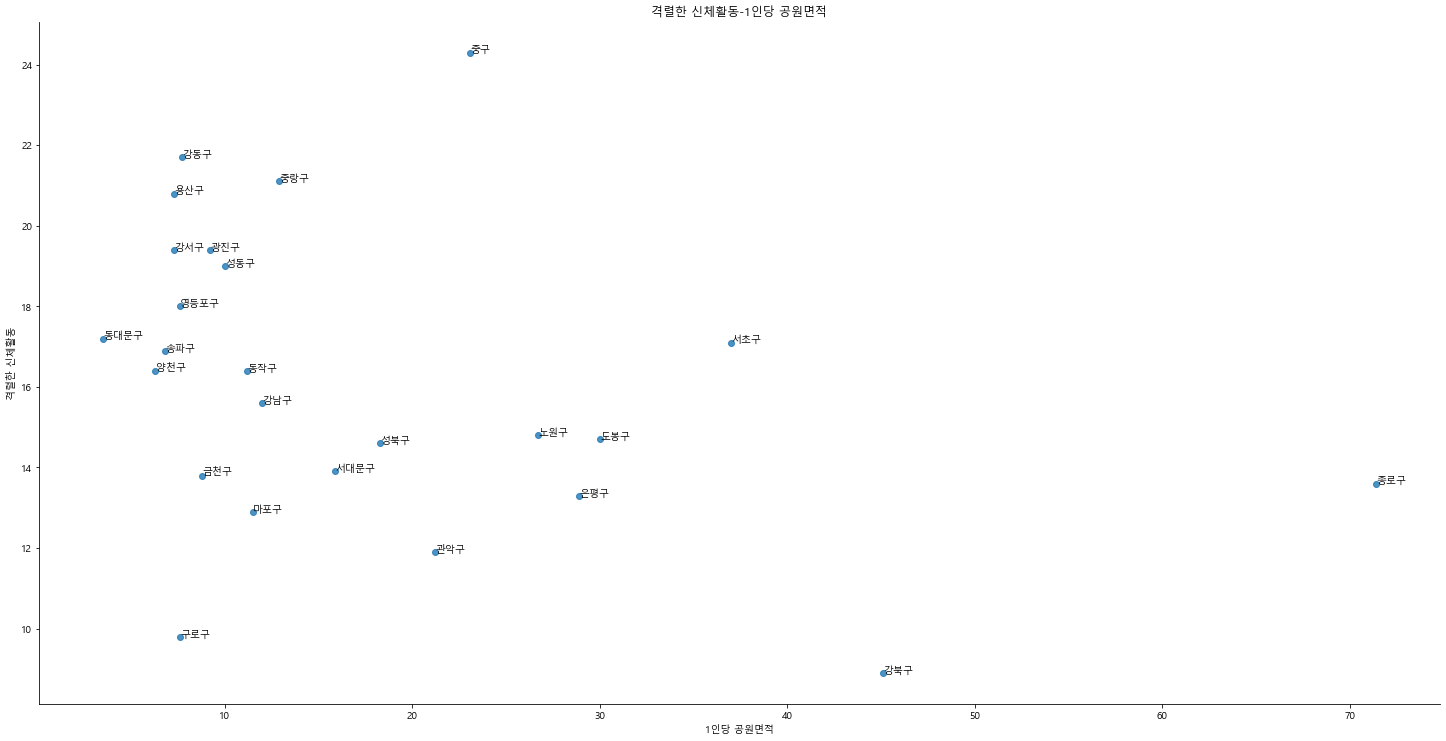

In [6]:
p1 = sns.lmplot(x ='1인당 공원 면적', # Horizontal axis
           y ='격렬한 신체활동 실천', # Vertical axis
           data=df1, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10,
           aspect =2 ) # size and dimension

plt.title('격렬한 신체활동-1인당 공원면적')
# Set x-axis label
plt.xlabel('1인당 공원면적')
# Set y-axis label
plt.ylabel('격렬한 신체활동')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df1['1인당 공원 면적'], df1['격렬한 신체활동 실천'], df1['자치구'], plt.gca())  

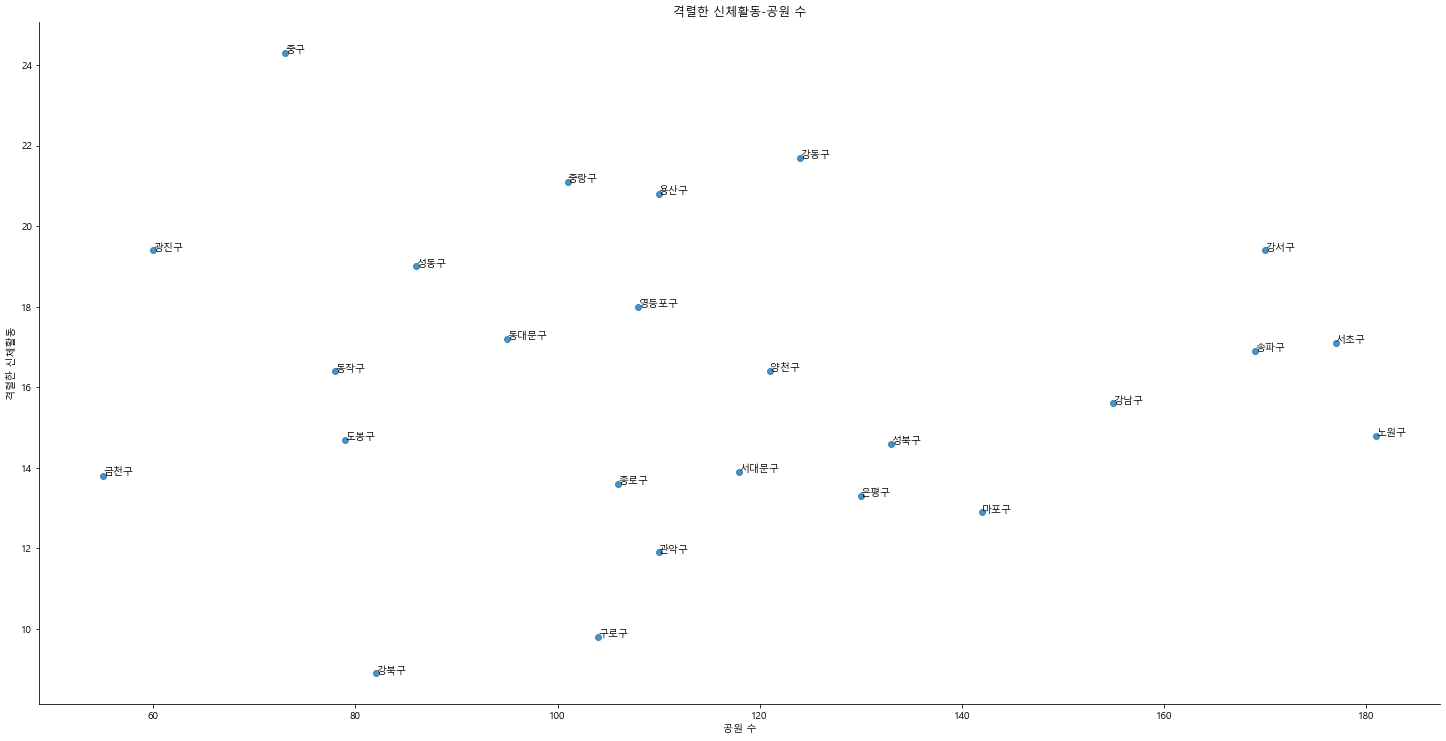

In [7]:
p2 = sns.lmplot(x ='공원 수', # Horizontal axis
           y ='격렬한 신체활동 실천', # Vertical axis
           data=df1, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10,
           aspect =2 ) # size and dimension

plt.title('격렬한 신체활동-공원 수')
# Set x-axis label
plt.xlabel('공원 수')
# Set y-axis label
plt.ylabel('격렬한 신체활동')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df1['공원 수'], df1['격렬한 신체활동 실천'], df1['자치구'], plt.gca())  

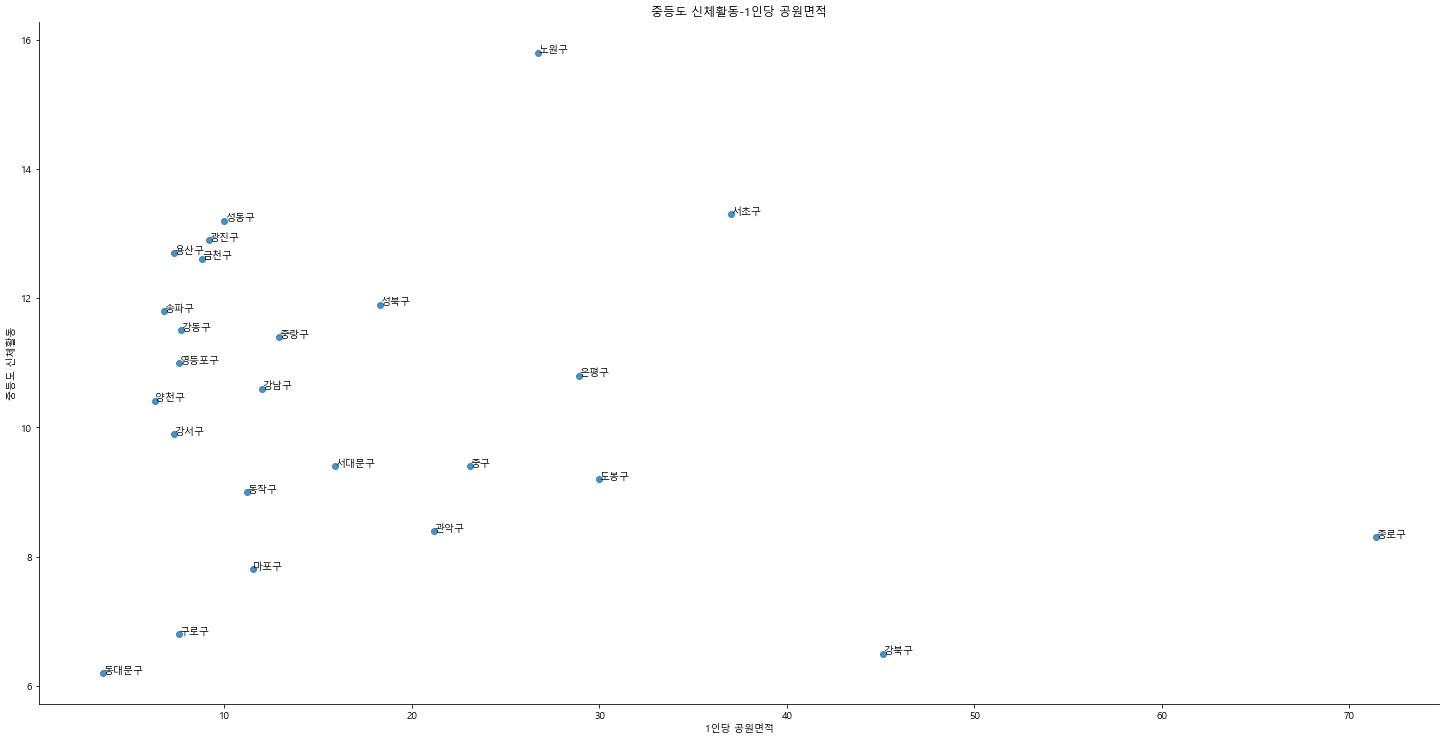

In [8]:
p3 = sns.lmplot(x ='1인당 공원 면적', # Horizontal axis
           y ='중등도 신체활동 실천', # Vertical axis
           data=df1, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10,
           aspect =2 ) # size and dimension

plt.title('중등도 신체활동-1인당 공원면적')
# Set x-axis label
plt.xlabel('1인당 공원면적')
# Set y-axis label
plt.ylabel('중등도 신체활동')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df1['1인당 공원 면적'], df1['중등도 신체활동 실천'], df1['자치구'], plt.gca())  

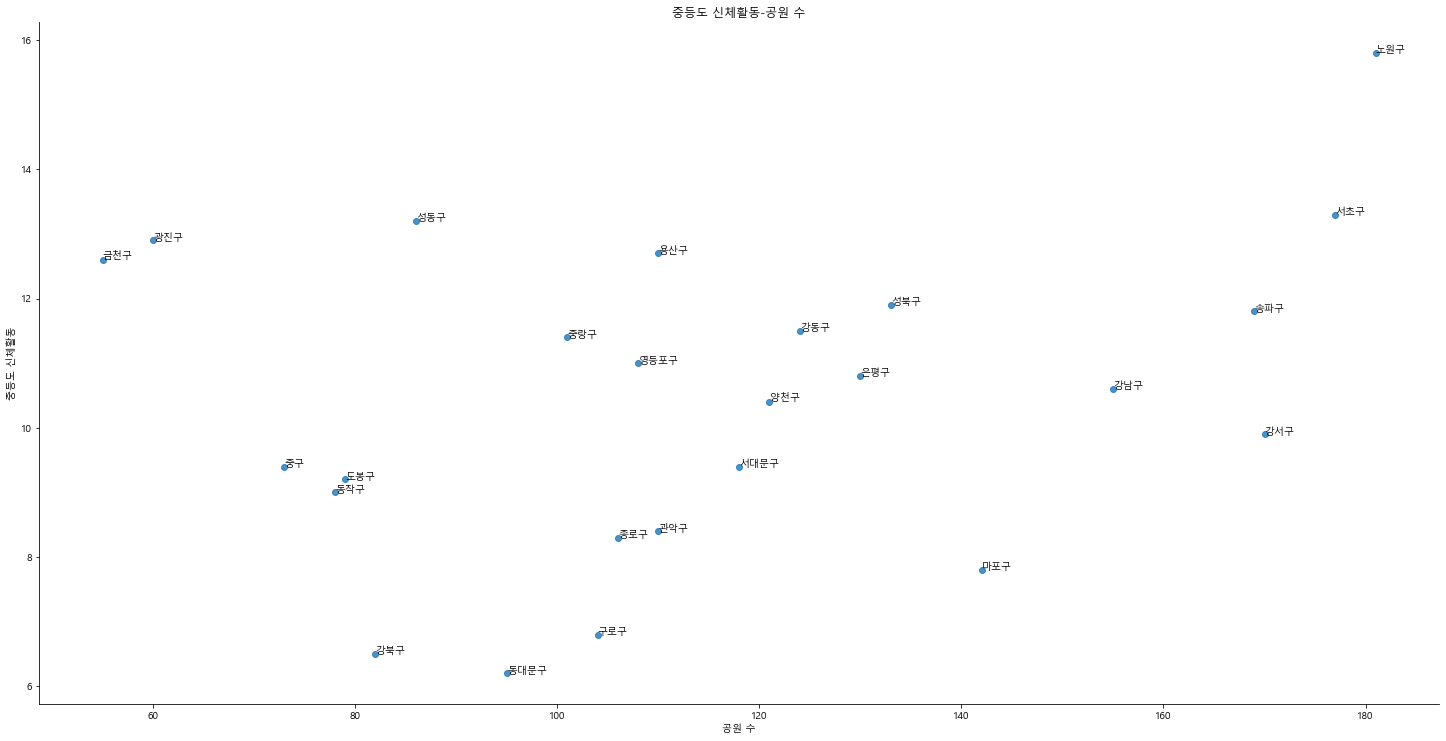

In [9]:
p2 = sns.lmplot(x ='공원 수', # Horizontal axis
           y ='중등도 신체활동 실천', # Vertical axis
           data=df1, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10,
           aspect =2 ) # size and dimension

plt.title('중등도 신체활동-공원 수')
# Set x-axis label
plt.xlabel('공원 수')
# Set y-axis label
plt.ylabel('중등도 신체활동')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df1['공원 수'], df1['중등도 신체활동 실천'], df1['자치구'], plt.gca())  